# Train script for Ladder VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
import torch

import sys
sys.path.append("../../Modules")
sys.path.append("../../Datasets")

# local imports
from train import train
from helpers import nll_loss
from models import LadderVAE
from ToyDatasets.timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 32
num_steps = 16
dataset_size = 5000
num_classes = 10

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)
valid_data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size,quantization=num_classes),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)
valid_batch_loader = iter(valid_data_loader)

## Define model

In [3]:
model = LadderVAE(input_size=1,hidden_sizes=[350,250,150],latent_sizes=[100,40,20],recon_hidden_size=256,output_size=num_classes,use_softmax=True)
print("Number of trainable parameters {}".format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# test forward pass
try:
    initial_batch = batch_loader.next()
    x = Variable(initial_batch).type(torch.FloatTensor).transpose(1,0)
    test,_ = model(x)
    assert (test.shape[0] == x.shape[0] and test.shape[1] == x.shape[1] and test.shape[2] == num_classes)
    print("Forward pass succesfull")
except:
    print("Error in forward pass. Output should have shape: {} but had {}".format(x.contiguous().view(-1).shape,test.view(-1).shape))

Number of trainable parameters 870026
Forward pass succesfull


## Define optimizer and loss

In [4]:
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.5,verbose=True,cooldown=200)

## Run trainer


Train (1 2%) elbo: -1.6605 r_loss: -1.6605 kl: 939.3771 aux_loss: 0.0000 beta 0.00e+00
Valid (1 2%) elbo: -1.1942 r_loss: -1.1942 kl: 1862.4470 aux_loss: 0.0000 beta 0.00e+00

Train (2 4%) elbo: -1.0346 r_loss: -0.9094 kl: 613.6066 aux_loss: 0.0000 beta 2.04e-04
Valid (2 4%) elbo: -0.8128 r_loss: -0.7327 kl: 392.2246 aux_loss: 0.0000 beta 2.04e-04

Train (3 6%) elbo: -0.7733 r_loss: -0.6456 kl: 312.8633 aux_loss: 0.0000 beta 4.08e-04
Valid (3 6%) elbo: -0.6707 r_loss: -0.5519 kl: 290.9831 aux_loss: 0.0000 beta 4.08e-04

Train (4 8%) elbo: -0.6757 r_loss: -0.5221 kl: 250.9794 aux_loss: 0.0000 beta 6.12e-04
Valid (4 8%) elbo: -0.5217 r_loss: -0.3869 kl: 220.2866 aux_loss: 0.0000 beta 6.12e-04

Train (5 10%) elbo: -0.6132 r_loss: -0.4386 kl: 213.8837 aux_loss: 0.0000 beta 8.16e-04
Valid (5 10%) elbo: -0.4447 r_loss: -0.2955 kl: 182.8190 aux_loss: 0.0000 beta 8.16e-04

Train (6 12%) elbo: -0.5412 r_loss: -0.3458 kl: 191.4766 aux_loss: 0.0000 beta 1.02e-03
Valid (6 12%) elbo: -0.4169 r_los


Train (47 94%) elbo: -0.5851 r_loss: -0.1143 kl: 50.1538 aux_loss: 0.0000 beta 9.39e-03
Valid (47 94%) elbo: -0.5152 r_loss: -0.0758 kl: 46.8070 aux_loss: 0.0000 beta 9.39e-03

Train (48 96%) elbo: -0.5975 r_loss: -0.1184 kl: 49.9533 aux_loss: 0.0000 beta 9.59e-03
Valid (48 96%) elbo: -0.5365 r_loss: -0.1058 kl: 44.9010 aux_loss: 0.0000 beta 9.59e-03

Train (49 98%) elbo: -0.6115 r_loss: -0.1249 kl: 49.6695 aux_loss: 0.0000 beta 9.80e-03
Valid (49 98%) elbo: -0.5604 r_loss: -0.1016 kl: 46.8392 aux_loss: 0.0000 beta 9.80e-03

Train (50 100%) elbo: -0.6236 r_loss: -0.1296 kl: 49.4020 aux_loss: 0.0000 beta 1.00e-02
Valid (50 100%) elbo: -0.5886 r_loss: -0.1240 kl: 46.4611 aux_loss: 0.0000 beta 1.00e-02


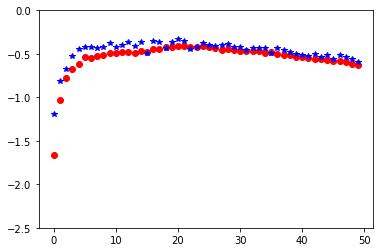

In [5]:
# use at least 50 iterations to get good results
train(data_loader,valid_data_loader,model,optimizer,scheduler,loss_fn=nll_loss,kl_loss_fn=None,n_iters=50,use_softmax=True,max_beta=1e-2,print_every=1,plot_pred=False)

In [6]:
#torch.save(model.state_dict(),"../../Saved_models/ToyDataset/LadderVAE_nll_best.pt")

## Model results:

### Model 1
with the following settings: 

hidden_sizes=[256,128,64], latent_sizes=[32,16,8], recon_hidden_size=128, with 279940 trainable parameters

| Dataset | ELBO | nll | kl | beta |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| Train | -0.4809 | -0.1179 | 36.2942 | 1e-2 |
| Valid | -0.4773| -0.1227 | 35.4518 | 1e-2 |

### Model 2
with the following settings: 

hidden_sizes=[256,128,64], latent_sizes=[64,32,16], recon_hidden_size=128, with 357044 trainable parameters

| Dataset | ELBO | nll | kl | beta |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| Train | -0.4754 | -0.0587 | 41.6707 | 1e-2 |
| Valid | -0.4530| -0.0471 | 40.5872 | 1e-2 |
